In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob

In [2]:
im = np.load('../../demos/perms_unique/ims_0000.npy')

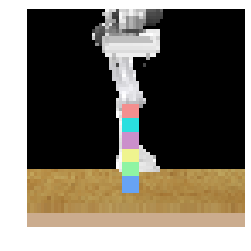

In [3]:
plt.imshow(im)
plt.axis('off')
plt.show()

In [4]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.style.use('seaborn')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

matplotlib.rcParams.update(nice_fonts)

In [5]:
# Load Sinkhorn data
flist = sorted(glob.glob('./tau_s*'))

tau_sink = []
for f in flist:
    tau_sink.append(np.genfromtxt(f))

flist = sorted(glob.glob('./acc_s*'))
acc_sink = []
for f in flist:
    acc_sink.append(np.genfromtxt(f))

flist = sorted(glob.glob('./precision_s*'))
pre_sink = []
for f in flist:
    pre_sink.append(np.genfromtxt(f))

In [6]:
# Demo numbers
demos = np.arange(1,720,50,dtype='int')

In [7]:
# Load TCN data
flist = sorted(glob.glob('./tau_t*'))

tau_tcn = []
for f in flist:
    tau_tcn.append(np.genfromtxt(f))

flist = sorted(glob.glob('./acc_t*'))
acc_tcn = []
for f in flist:
    acc_tcn.append(np.genfromtxt(f))

flist = sorted(glob.glob('./precision_t*'))
pre_tcn = []
for f in flist:
    pre_tcn.append(np.genfromtxt(f))

In [8]:
# Perfect baseline (no generalisation)
from itertools import permutations
from scipy.stats import kendalltau
perms = np.array(list(permutations(np.arange(6),6)))

baseline_tau = []
baseline_acc = []
baseline_pre = []
for d in demos:
    perms_copy = np.copy(perms)
    perms_shuffled = np.copy(perms_copy[d:,:])
    np.random.shuffle(perms_shuffled)
    perms_copy[d:,:] = perms_shuffled
    tau_list = []
    acc_list = []
    pre_list = []
    for k in range(perms.shape[0]):
        tau,p = kendalltau(perms[k,:],perms_copy[k,:])
        tau_list.append(tau)
        acc = np.array_equal(perms[k,:],perms_copy[k,:])
        pre = np.sum(perms[k,:]==perms_copy[k,:])/perms[k,:].shape[0]
        acc_list.append(acc)
        pre_list.append(pre)
    baseline_tau.append(tau_list)
    baseline_acc.append(acc_list)
    baseline_pre.append(pre_list)
    
hists_baseline = []
for t in np.vstack(baseline_tau):
    h,_ = np.histogram(t,np.linspace(-1,1,10))
    hists_baseline.append(h)

In [9]:
# Acc_sink = np.sum(np.vstack(acc_sink),axis=1)/720
# Acc_tcn = np.sum(np.vstack(acc_tcn),axis=1)/720
# Acc_base = np.sum(np.vstack(baseline_acc),axis=1)/720
# plt.plot(demos[0:Acc_sink.shape[0]],Acc_sink,linewidth=3,label='BC+Sink')
# plt.plot(demos[0:Acc_tcn.shape[0]],Acc_tcn,linewidth=3,label='BC+TCN')
# plt.plot(demos,Acc_base,'--',linewidth=3,label='No generalisation')
# plt.ylabel('Accuracy')
# plt.xlabel('Demonstrations')
# plt.legend()
# plt.savefig('Accuracy.pdf')
# plt.show()

In [10]:
smean = np.array([np.mean(t) for t in tau_sink])
sstd = np.array([np.std(t) for t in tau_sink])

tmean = np.array([np.mean(t) for t in tau_tcn])
tstd = np.array([np.std(t) for t in tau_tcn])

In [11]:
bmean = np.array([np.mean(t) for t in baseline_tau])
bstd = np.array([np.std(t) for t in baseline_tau])

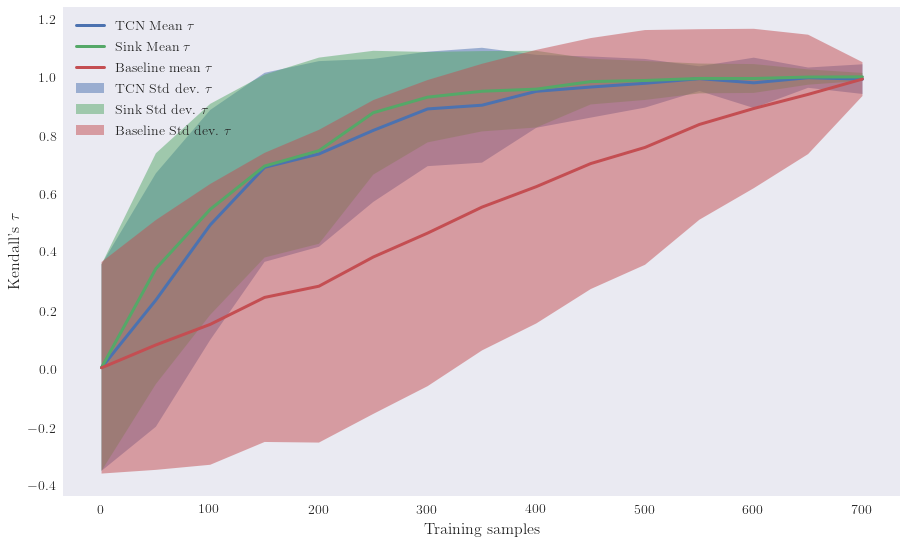

In [12]:
plt.figure(figsize=(15,9))
plt.plot(demos[0:len(tmean)],tmean,linewidth=3,label='TCN Mean $\\tau$')
plt.fill_between(demos[0:len(tmean)],tmean-tstd,tmean+tstd,alpha=0.5,label='TCN Std dev. $\\tau$')

plt.plot(demos[0:len(smean)],smean,linewidth=3,label='Sink Mean $\\tau$')
plt.fill_between(demos[0:len(smean)],smean-sstd,smean+sstd,alpha=0.5,label='Sink Std dev. $\\tau$')

plt.plot(demos[0:len(bmean)],bmean,linewidth=3,label='Baseline mean $\\tau$')
plt.fill_between(demos[0:len(bmean)],bmean-bstd,bmean+bstd,alpha=0.5,label='Baseline Std dev. $\\tau$')

plt.xlabel('Training samples')
plt.ylabel('Kendall\'s $\\tau$')
plt.grid()
plt.legend()
plt.show()

In [13]:
hists_sink = []
for t in tau_sink:
    h,_ = np.histogram(t,np.linspace(-1,1,10))
    hists_sink.append(h)
    
hists_tcn = []
for t in tau_tcn:
    h,_ = np.histogram(t,np.linspace(-1,1,10))
    hists_tcn.append(h)

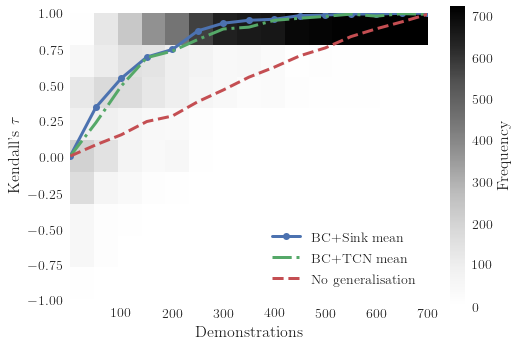

In [14]:
# Compare on Sinkhorn hists
plt.imshow(np.vstack(hists_sink).T,extent=(demos[0],demos[-1],-1,1),aspect=280,origin='lower',vmin=0,vmax=720,interpolation='None')
plt.plot(demos[0:len(smean)],smean,'-o',linewidth=3,label='BC+Sink mean')
plt.plot(demos[0:len(tmean)],tmean,'-.',linewidth=3,label='BC+TCN mean')
plt.plot(demos,bmean,'--',linewidth=3,label='No generalisation')
plt.colorbar(label='Frequency')
plt.legend(loc='lower right')
plt.grid()
plt.ylabel('Kendall\'s $\\tau$')
plt.xlabel('Demonstrations')

plt.savefig('Generalisation.pdf')
plt.show()

In [15]:
hists_p_sink = []
for p in pre_sink:
    h,_ = np.histogram(p,np.linspace(0,1,5))
    hists_p_sink.append(h)

hists_p_tcn = []
for p in pre_tcn:
    h,_ = np.histogram(p,np.linspace(0,1,5))
    hists_p_tcn.append(h)
    
pmean_sink = np.array([np.mean(p) for p in pre_sink])
pstd_sink = np.array([np.std(p) for p in pre_sink])

pmean_tcn = np.array([np.mean(p) for p in pre_tcn])
pstd_tcn = np.array([np.std(p) for p in pre_tcn])

bpmean = np.array([np.mean(p) for p in baseline_pre])
bpstd = np.array([np.std(p) for p in baseline_pre])

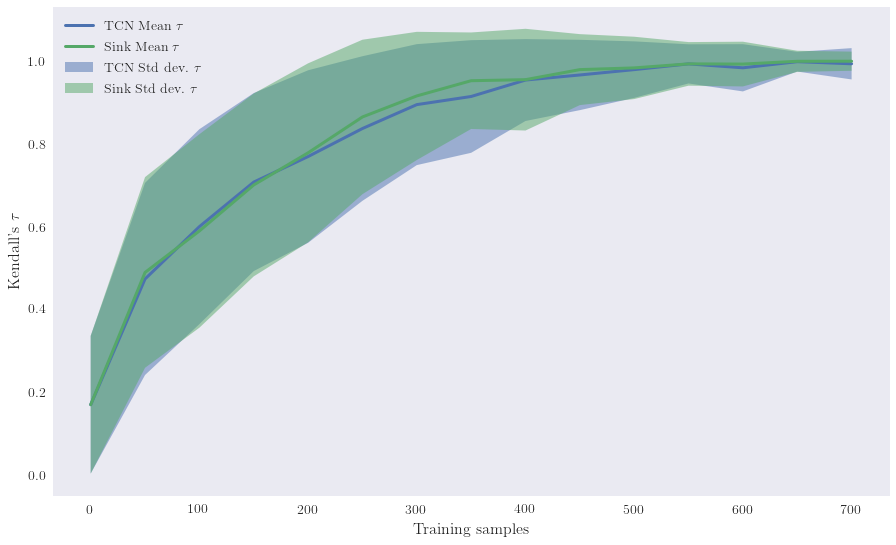

In [16]:
plt.figure(figsize=(15,9))
plt.plot(demos[0:len(pmean_tcn)],pmean_tcn,linewidth=3,label='TCN Mean $\\tau$')
plt.fill_between(demos[0:len(pmean_tcn)],pmean_tcn-pstd_tcn,pmean_tcn+pstd_tcn,alpha=0.5,label='TCN Std dev. $\\tau$')

plt.plot(demos[0:len(pmean_sink)],pmean_sink,linewidth=3,label='Sink Mean $\\tau$')
plt.fill_between(demos[0:len(pmean_sink)],pmean_sink-pstd_sink,pmean_sink+pstd_sink,alpha=0.5,label='Sink Std dev. $\\tau$')

plt.xlabel('Training samples')
plt.ylabel('Kendall\'s $\\tau$')
plt.grid()
plt.legend()
plt.show()

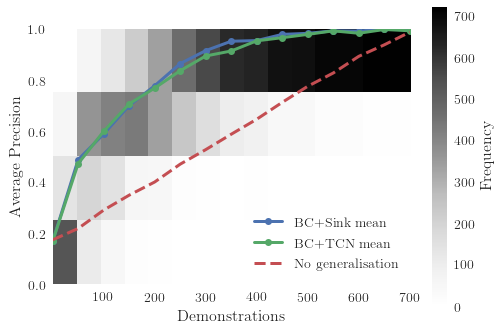

In [17]:
# Compare on Sinkhorn hists
plt.imshow(np.vstack(hists_p_sink).T,extent=(demos[0],demos[-1],0,1),aspect=500,origin='lower',vmin=0,vmax=720,interpolation='None')
plt.plot(demos[0:len(pmean_sink)],pmean_sink,'-o',linewidth=3,label='BC+Sink mean')
plt.plot(demos[0:len(pmean_tcn)],pmean_tcn,'-o',linewidth=3,label='BC+TCN mean')
plt.plot(demos,bpmean,'--',linewidth=3,label='No generalisation')
plt.colorbar(label='Frequency')
plt.legend(loc='lower right')
plt.grid()
plt.ylabel('Average Precision')
plt.xlabel('Demonstrations')
plt.show()

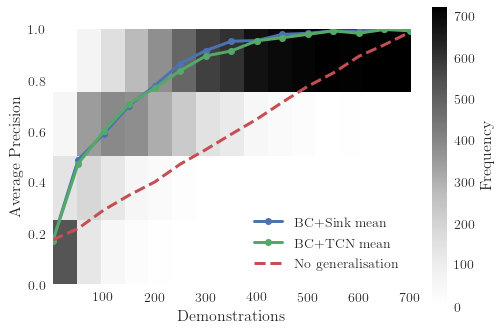

In [18]:
# Compare on Sinkhorn hists
plt.imshow(np.vstack(hists_p_tcn).T,extent=(demos[0],demos[-1],0,1),aspect=500,origin='lower',vmin=0,vmax=720,interpolation='None')
plt.plot(demos[0:len(pmean_sink)],pmean_sink,'-o',linewidth=3,label='BC+Sink mean')
plt.plot(demos[0:len(pmean_tcn)],pmean_tcn,'-o',linewidth=3,label='BC+TCN mean')
plt.plot(demos,bpmean,'--',linewidth=3,label='No generalisation')
plt.colorbar(label='Frequency')
plt.legend(loc='lower right')
plt.grid()
plt.ylabel('Average Precision')
plt.xlabel('Demonstrations')
plt.show()